In [4]:
import pandas as pd
import numpy as np
import urllib

In [5]:
Abalone_Dataset= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
Abalone_Dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
pd.DataFrame(data=[Abalone_Dataset.min(),Abalone_Dataset.max()], index=['min','max'])

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
min,F,0.075,0.055,0.00,0.0020,0.001,0.0005,0.0015,1
max,M,0.815,0.650,1.13,2.8255,1.488,0.7600,1.0050,29


In [7]:
Abalone_Dataset.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

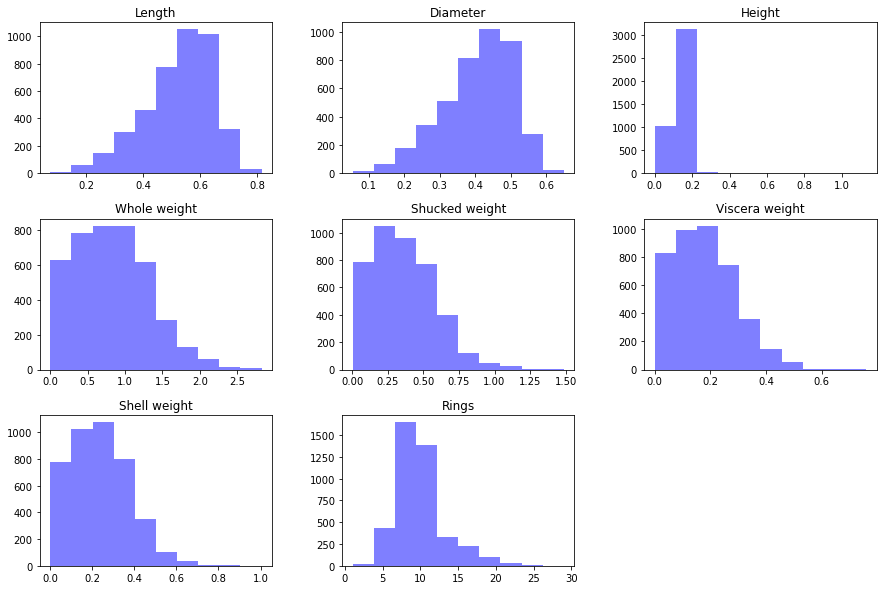

In [8]:
Abalone_Dataset.hist(figsize=(15,10), grid=False, alpha=0.5, color= 'Blue')

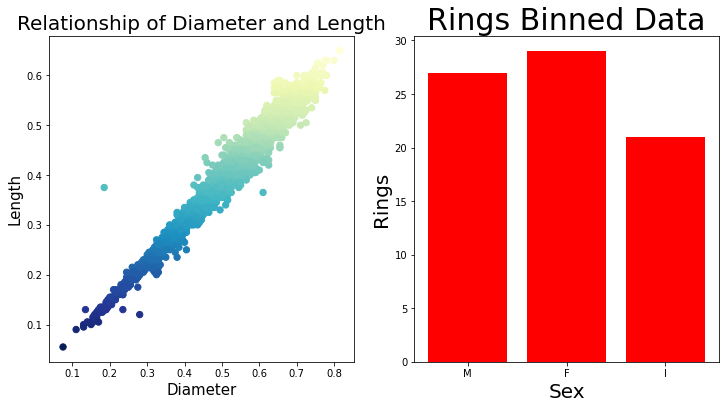

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Relationship of Diameter and Length", size= 20)
plt.xlabel('Diameter',size=15)
plt.ylabel('Length',size=15)
plt.scatter(Abalone_Dataset['Length'],Abalone_Dataset['Diameter'], c=Abalone_Dataset['Diameter'],s=40,cmap='YlGnBu_r')

plt.subplot(1,2,2)
plt.title("Rings Binned Data", size= 30)
plt.bar(Abalone_Dataset['Sex'], Abalone_Dataset['Rings'], color= 'red')
plt.xlabel('Sex',size=20)
plt.ylabel('Rings',size=20)
plt.show()

In [10]:
Abalone_Dataset.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [11]:
Abalone_Dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
Abalone_Dataset.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(Abalone_Dataset['Sex'])

LabelEncoder()

In [14]:
le.classes_

array(['F', 'I', 'M'], dtype=object)

In [15]:
Abalone_Dataset['Sex'] = le.transform(Abalone_Dataset['Sex'])

In [16]:
le.inverse_transform([2,1,0])

array(['M', 'I', 'F'], dtype=object)

In [17]:
targets = Abalone_Dataset.pop('Rings')
targets

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [18]:
features = Abalone_Dataset.iloc[:,:-1]
features

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395
...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610


In [19]:
targets = np.array(targets)
features = np.array(features)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(features,targets,test_size=0.2,random_state=42)

In [21]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
from sklearn.svm import SVR

svm=SVR(kernel='poly',C=2, gamma='auto',degree=3, epsilon=0.6,coef0=1)
svm.fit(X_train, Y_train)

SVR(C=2, coef0=1, epsilon=0.6, gamma='auto', kernel='poly')

In [23]:
svm.predictions = np.floor(svm.predict(X_test))

In [24]:
from sklearn.model_selection import cross_validate
cross_validate(svm,X_test,Y_test,cv=5)

{'fit_time': array([0.06488585, 0.06248522, 0.12496972, 0.10934877, 0.04686117]),
 'score_time': array([0.01562214, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.511691  , 0.56274293, 0.44850276, 0.58046963, 0.44075629])}

In [25]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, svm.predictions)
mae

1.5095693779904307

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_test,Y_test)
predictions = np.floor(rf.predict(X_test))

In [27]:
cross_validate(rf,X_test,Y_test,cv=5)

{'fit_time': array([0.23767948, 0.18251038, 0.23444819, 0.18353701, 0.19373488]),
 'score_time': array([0.00997281, 0.01562142, 0.0119648 , 0.01788855, 0.        ]),
 'test_score': array([0.33339628, 0.44458489, 0.23611056, 0.40454886, 0.31366892])}

In [28]:
mae = mean_absolute_error(Y_test, predictions)
mae

1.6913875598086126

In [29]:
from sklearn.linear_model import SGDRegressor

sgd=RandomForestRegressor(max_depth=2, random_state=0)
sgd.fit(X_test,Y_test)
preds=np.floor(sgd.predict(X_test))

In [30]:
cross_validate(sgd,X_test,Y_test,cv=5)

{'fit_time': array([0.21645045, 0.2177639 , 0.21869802, 0.18745613, 0.20792055]),
 'score_time': array([0.        , 0.        , 0.        , 0.01562071, 0.        ]),
 'test_score': array([0.33339628, 0.44458489, 0.23611056, 0.40454886, 0.31366892])}

In [31]:
mae = mean_absolute_error(Y_test, preds)
mae

1.6913875598086126

In [32]:
from sklearn.neighbors import KNeighborsRegressor as nn

knn = nn(8,weights='uniform')
knn.fit(X_train,Y_train) 

KNeighborsRegressor(n_neighbors=8)

In [33]:
predi=np.floor(knn.predict(X_test))

In [34]:
cross_validate(knn,X_test,Y_test,cv=5)

{'fit_time': array([0.00398898, 0.0029912 , 0.0029912 , 0.00498772, 0.00199533]),
 'score_time': array([0.00498748, 0.00499511, 0.0039885 , 0.00299287, 0.00299168]),
 'test_score': array([0.37770523, 0.48820826, 0.42153152, 0.45839804, 0.39094694])}

In [35]:
mae = mean_absolute_error(Y_test, predi)
mae

1.6172248803827751

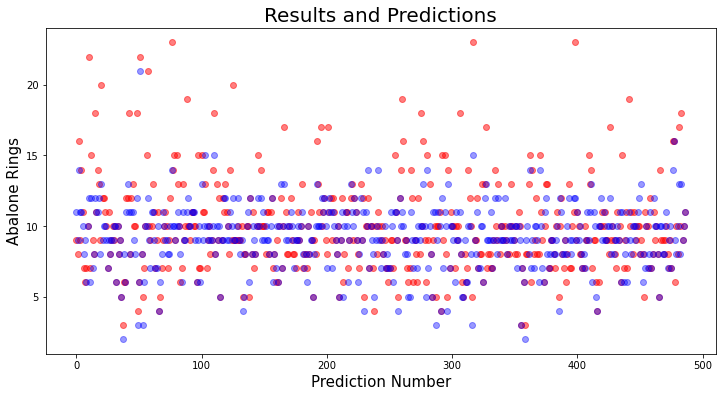

In [39]:
npoints = len(X_test)
graph_points = np.random.randint(npoints)
xdata = range(len(X_test[: graph_points]))
ydata = Y_test[: graph_points]
ypreds = svm.predictions[: graph_points]
plt.figure(figsize=(12,6))
plt.title("Results and Predictions",size=20)
plt.xlabel('Prediction Number',size=15)
plt.ylabel('Abalone Rings',size=15)
plt.scatter(xdata,ydata,color='red',alpha=0.5)
plt.scatter(xdata,ypreds,color='blue',alpha=0.4)
plt.show()